# Vectorización de texto

En esta notebook voy a trabajar con un dataset de letras de tango.

In [3]:
import pandas as pd

In [4]:
url = "https://raw.githubusercontent.com/gefero/tango_scrap/refs/heads/master/Data/data_merged_raw"
df_base = pd.read_csv(url, sep = ";")

In [5]:
ritmos = df_base.ritmo_tt.value_counts().index[0:5]

f = df_base.letra_cons.notna() & df_base.ritmo_tt.isin(ritmos)
df = df_base[f].copy()
# df = df.groupby("ritmo_tt").sample(100)
df.head()

,link_tt,titulo,ritmo_tt,ano_tt,musica_tt,compositor_tt,letra_tt,autor_re,compositor_re,fecha_re,letra_re,link_re,ritmo_re,ano_re,letra_cons,year_cons
0,http://www.todotango.com/musica/tema/130/A-bai...,a bailar,tango,1943,domingo federico,homero exposito,a bailar a bailar | que la orquesta se va | so...,Homero Expósito,Domingo Federico,1943-11-05,"¡A bailar, a bailar\r\r\nque la orquesta se va...",https://www.el-recodo.com/music?id=02903&lang=en,TANGO,1943.0,a bailar a bailar | que la orquesta se va | so...,1943
1,http://www.todotango.com/musica/tema/7866/A-ba...,a bailar el tango,tango,1962,leopoldo diaz velez,leopoldo diaz velez,este tango nacio para bailarse | y asi hamacar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,este tango nacio para bailarse | y asi hamacar...,1962
3,http://www.todotango.com/musica/tema/3647/A-Be...,a beba bidart,poema lunfardo,vacio,vacio,alberto uemura,nacio en la calle quito | entre boedo y colomb...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nacio en la calle quito | entre boedo y colomb...,vacio
5,http://www.todotango.com/musica/tema/2864/A-bo...,a bordo de mis zapatos,milonga,vacio,cesar isella,eugenio majul,camine todas las calles\r\r\nde buenos aires y...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,camine todas las calles\r\r\nde buenos aires y...,vacio
7,http://www.todotango.com/musica/tema/3843/A-Bu...,a buenos aires,milonga,vacio,edmundo rivero,edmundo rivero,en tu baraje gringo ciudad mia | vas perdiendo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en tu baraje gringo ciudad mia | vas perdiendo...,vacio


En el TP 1 les pedía que dijeran qué tipo de variable era cada una. La clasificación más habitual es entre categóricas y numéricas; y dentro de las numéricas, las discretas y las continuas; y dentro de las categóricas, las nominales y las ordinales.

¿Pero qué clase de variable es `letra_re`?

El punto es que el texto es un tipo de dato muy especial, que suele denominar "no estructurado". Para laburar con él en el marco de la estadística y el machine learning, es necesario estructurarlo de alguna manera. ¿Pero cómo?

Hay muchísimas maneras de hacer esto. La manera que elijamos va a tener un impacto en nuestros resultados.

## Feature engineering (a mano)

Una forma que se parece más a los que se hace en otras áreas de machine learning es hacer una feature extraction a mano, con nuestro conocimiento de campo.

Por ejemplo, podemos representar cada texto mediante su TTR, como en el TP 1, y agregar otras features. Acá las opciones son infinitas y un poco dependen de nuestra creatividad.

En principio, querríamos encontrar features significativas para nuestro problema. Por ejemplo, en caso de clasificación, que separe bien los datos. Además, idealmente estas features no deberían estar correlacionadas.

In [6]:
import numpy as np

In [7]:
def ttr_log(words):
  words = words.split()
  unique_words = set(words)
  return len(unique_words)/np.log(len(words))

def len_word(words):
  words = words.split()
  return np.mean([len(word) for word in words])

In [8]:
df.loc[:, "len_word"] = df["letra_cons"].apply(len_word)
df.loc[:, "ttr_log"] = df["letra_cons"].apply(ttr_log)

### Visualización

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

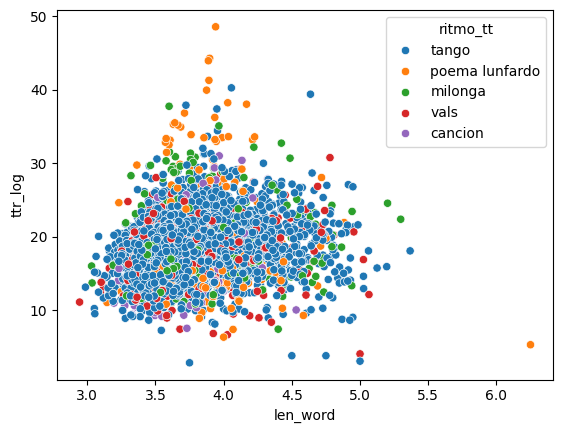

In [10]:
sns.scatterplot(data=df, x=df["len_word"], y=df["ttr_log"], hue=df["ritmo_tt"])
plt.show()

## CountVectorizer

Existen maneras un poco más automáticas de crear features. El CountVectorizer, también llamado "bolsa de palabras", crea tantas features como palabras en el vocabulario. El valor de cada feature para cada texto va a depender de la cantidad de veces que aparece dicha palabra (0 o más).

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [12]:
X = vectorizer.fit_transform(df["letra_cons"])

In [13]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5853, 41607))

In [14]:
vectorizer.get_feature_names_out()

array(['0242', '10', '100', ..., 'única', 'único', 'übers'],
      shape=(41607,), dtype=object)

In [15]:
vectorizer.vocabulary_

{'bailar': 4844,
 'que': 32174,
 'la': 23068,
 'orquesta': 28272,
 'se': 35712,
 'va': 39938,
 'sobre': 36579,
 'el': 14634,
 'fino': 18489,
 'garabato': 19394,
 'de': 11810,
 'un': 39788,
 'tango': 37743,
 'nervioso': 27321,
 'lerdo': 23564,
 'ira': 22483,
 'borrando': 5986,
 'recuerdo': 33169,
 'ultimo': 39769,
 'perfuma': 29806,
 'noche': 27436,
 'dulce': 14418,
 'dice': 13651,
 'adios': 945,
 'frase': 18891,
 'callada': 6887,
 'asoma': 4058,
 'los': 24295,
 'labios': 23075,
 'canta': 7294,
 'despedida': 13123,
 'vamos': 40061,
 'tal': 37654,
 'vez': 40572,
 'no': 27426,
 'vuelvas': 41204,
 'verla': 40463,
 'nunca': 27651,
 'este': 17284,
 'es': 16591,
 'quedara': 32227,
 'salon': 35408,
 'vacio': 39955,
 'con': 9761,
 'monton': 26548,
 'esperanzas': 17051,
 'iran': 22489,
 'camino': 7082,
 'al': 1640,
 'olvido': 28080,
 'nacio': 27109,
 'para': 28741,
 'bailarse': 4856,
 'asi': 4026,
 'hamacarse': 20622,
 'muy': 27042,
 'suavemente': 37108,
 'oigan': 27953,
 'ustedes': 39912,
 'com

In [16]:
pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())

,0242,10,100,11,113,1156,12,13,1421,15,...,ópera,óperas,óyeme,última,últimas,último,últimos,única,único,übers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5848,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5849,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5850,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5851,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.DataFrame(vectorizer.transform(["última últimas última"]).toarray(), columns = vectorizer.get_feature_names_out())

# Palabras no vistas en la fase de entrenamiento se ignoran

,0242,10,100,11,113,1156,12,13,1421,15,...,ópera,óperas,óyeme,última,últimas,último,últimos,única,único,übers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,1,0,0,0,0,0


In [18]:
X[0, :]

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 50 stored elements and shape (1, 41607)>

In [19]:
np.argmax(X[0,:].toarray())

np.int64(4844)

In [20]:
vectorizer.get_feature_names_out()[4844]

'bailar'

In [21]:
np.sum(X, axis = 0)

matrix([[1, 1, 3, ..., 3, 3, 3]], shape=(1, 41607))

In [22]:
np.argmax(np.sum(X, axis = 0))

np.int64(11810)

In [23]:
vectorizer.get_feature_names_out()[np.argmax(np.sum(X, axis = 0))]

'de'

In [24]:
np.argsort(-np.sum(X, axis = 0))

matrix([[11810, 32174, 23068, ...,     3,     1,     0]], shape=(1, 41607))

In [25]:
conteos = np.sum(X, axis = 0)
dim_palabras_frecuentes = np.argsort(-np.sum(X, axis = 0))
palabras_frecuentes = list()

for n in range(0,10):
    dim = dim_palabras_frecuentes[0, n]
    palabra = vectorizer.get_feature_names_out()[dim]
    freq = int(conteos[0, dim])
    palabras_frecuentes.append({"palabra": palabra, "frecuencia": freq})

palabras_frecuentes_df = pd.DataFrame(palabras_frecuentes)

<Axes: xlabel='palabra', ylabel='frecuencia'>

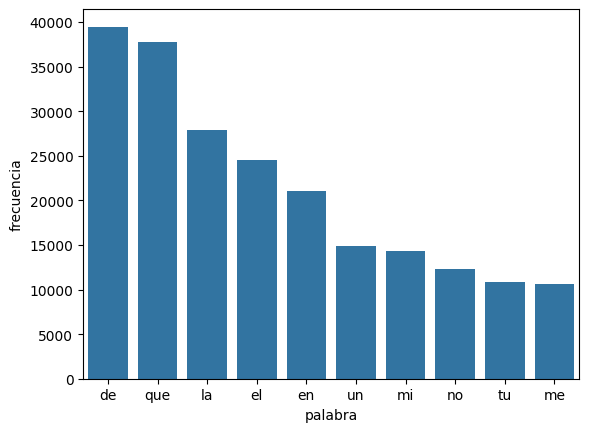

In [26]:
sns.barplot(x = palabras_frecuentes_df["palabra"], y = palabras_frecuentes_df["frecuencia"])

In [27]:
vec_ = CountVectorizer(ngram_range = (1, 2))
vec_.fit_transform(df["letra_cons"])
vec_.get_feature_names_out() # Un shape mucho mayor

array(['0242', '0242 de', '10', ..., 'único rayo', 'übers', 'übers meer'],
      shape=(386516,), dtype=object)

In [28]:
vec_ = CountVectorizer(max_features = 100)
vec_.fit_transform(df["letra_cons"])
vec_.get_feature_names_out()

array(['al', 'alma', 'amor', 'aquel', 'asi', 'ayer', 'bien', 'cancion',
       'cielo', 'como', 'con', 'corazon', 'cuando', 'de', 'del', 'dia',
       'dolor', 'donde', 'dos', 'el', 'ella', 'en', 'entre', 'era', 'es',
       'esa', 'ese', 'esta', 'este', 'flor', 'fue', 'ha', 'hasta', 'hay',
       'he', 'hoy', 'ilusion', 'la', 'las', 'le', 'lo', 'los', 'luz',
       'mas', 'me', 'mi', 'mis', 'mujer', 'muy', 'nada', 'ni', 'no',
       'noche', 'nos', 'nunca', 'ojos', 'otra', 'pa', 'para', 'pena',
       'pero', 'pobre', 'por', 'porque', 'que', 'querer', 'quien',
       'quiero', 'se', 'ser', 'si', 'siempre', 'sin', 'sol', 'solo',
       'son', 'sos', 'soy', 'su', 'sus', 'tan', 'tango', 'tanto', 'te',
       'tengo', 'tiempo', 'todo', 'triste', 'tu', 'tus', 'un', 'una',
       'va', 'vez', 'vida', 'viejo', 'vos', 'voz', 'ya', 'yo'],
      dtype=object)

In [64]:
vec_ = CountVectorizer(max_features = 100, min_df = 0.5)
vec_.fit_transform(df["letra_cons"])
vec_.get_feature_names_out()

array(['al', 'amor', 'como', 'con', 'de', 'del', 'el', 'en', 'es', 'la',
       'las', 'los', 'me', 'mi', 'no', 'por', 'que', 'se', 'te', 'tu',
       'un', 'una'], dtype=object)

In [30]:
vec_ = CountVectorizer(max_features = 100, max_df = 0.1)
vec_.fit_transform(df["letra_cons"])
vec_.get_feature_names_out()

array(['adios', 'ahora', 'aires', 'alegria', 'algun', 'aquella', 'aqui',
       'arrabal', 'aunque', 'años', 'bajo', 'bandoneon', 'barrio', 'beso',
       'besos', 'boca', 'buenos', 'calle', 'camino', 'cantar', 'canto',
       'cariño', 'ciudad', 'cosas', 'cruel', 'da', 'destino', 'dulce',
       'emocion', 'entonces', 'esperanza', 'esquina', 'estas', 'estoy',
       'fe', 'feliz', 'fin', 'final', 'fui', 'fuiste', 'gente', 'gran',
       'han', 'has', 'hombre', 'igual', 'jamas', 'junto', 'labios',
       'lado', 'llorar', 'luna', 'madre', 'mano', 'manos', 'mañana',
       'mejor', 'mia', 'mientras', 'milonga', 'mismo', 'mucho', 'nadie',
       'noches', 'nombre', 'nuestro', 'nuevo', 'olvido', 'otro', 'pasado',
       'pasion', 'paso', 'pecho', 'penas', 'poco', 'puede', 'puedo',
       'recuerdos', 'sabe', 'siento', 'silencio', 'sobre', 'soledad',
       'sombra', 'sueños', 'tal', 'tambien', 'tarde', 'ti', 'tiene',
       'toda', 'todos', 'van', 'vas', 'veces', 'ves', 'vieja', 'viento',

## Lematización

In [31]:
import spacy

nlp = spacy.load("es_core_news_sm") # python -m spacy download es_core_news_sm

text = "Yo amo los ejercicios de NLP."

doc = nlp(text)

print([token.lemma_ for token in doc])

['yo', 'amar', 'el', 'ejercicio', 'de', 'NLP', '.']


In [32]:
print([token.pos for token in doc])

[<univ_pos_t.PRON: 95>, <univ_pos_t.VERB: 100>, <univ_pos_t.DET: 90>, <univ_pos_t.NOUN: 92>, <univ_pos_t.ADP: 85>, <univ_pos_t.PROPN: 96>, <univ_pos_t.PUNCT: 97>]


In [33]:
doc = nlp("En Argentina la app de mensajería más popular es WhatsApp")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Argentina 3 12 LOC
WhatsApp 49 57 PER


In [34]:
def text_2_lemma(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

df["letra_lema"] = df["letra_cons"].apply(text_2_lemma)
df["letra_lema"]

0        a bailar a bailar | que el orquesta él ir | so...
1        este tango nacio para bailar él | y asi hamaca...
3        nacio en el calle quito | entre boedo y colomb...
5        camine todo el calle \r\r\n de buenos aires y ...
7        en tu baraje gringo ciudad mia | vas perder tu...
                               ...                        
10049    escuche aparcero jue en uno mes de julio | azo...
10050    cuanta noche fatidica de vicio | tu ilusión du...
10051    zorro plateao | tú defender y ya tén cuarenta ...
10053    Morocho de ojazo negro \r\r\n Y chambergo requ...
10055    ser del tiempo lindo | que siempre ser antes |...
Name: letra_lema, Length: 5853, dtype: object

In [65]:
df["letra_cons"].iloc[0]

'a bailar a bailar | que la orquesta se va | sobre el fino garabato | de un tango nervioso y lerdo | se ira borrando el recuerdo | a bailar a bailar | que la orquesta se va | el ultimo tango perfuma la noche | un tango dulce que dice adios | la frase callada se asoma a los labios | y canta el tango la despedida! | vamos! a bailar! | tal vez no vuelvas a verla nunca | y el ultimo tango perfuma la noche | y este es el tango que dice el adios | a bailar a bailar | que la orquesta se va! | quedara el salon vacio | con un monton de esperanzas | que iran camino al olvido | a bailar a bailar | que la orquesta se va!'

## TF-IDF

TF-IDF es una especie de bolsa de palabras un poco más inteligente, que le asigna un score a cada atributo basándose no únicamente en la cantidad de veces que aparece la palabra en el documento, sino también en cuántas veces aparece esa palabra en otros documentos.

La intuición es que palabras que aparecen con mucha frecuencia en todos los documentos (el corpus) son menos informativas. En cambio, una palabra poco frecuente que aparece en algún documento aislado es muy informativa para ese documento.

$$ \mathrm{tf}(t, d) = \frac{f_{t,d}}{\sum_{t' \in d} f_{t',d}} $$

- Ranguea entre 0 y 1.
- Si un término aparece por ejemplo 90 veces en un documento de 100 palabras, tf = 0.9 (muy alto).
- Si el término aparece 1 veces, tf = 0.01 (muy bajo).

---

$$ \mathrm{idf}(t, D) = \log \left( \frac{N}{|\{ d \in D \mid t \in d \}|} \right) $$

- Ranguea entre log(1) = 0 y log(N).
- Si un término aparece en TODOS los documentos, idf = log(1) = 0 (muy bajo).
- Si aparece sólo en un documento, idf = log(N(muy alto)).
---

$$ \mathrm{tfidf}(t, d, D) = \mathrm{tf}(t, d) \times \mathrm{idf}(t, D) $$

El score final depende de ambos valores.


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 1000, max_df = 0.1)
X = vectorizer.fit_transform(df["letra_cons"])

In [37]:
vectorizer.idf_

array([5.34414713, 5.25603986, 5.31817164, 4.65760063, 5.72363675,
       5.37081537, 4.34216167, 5.28043131, 4.9563816 , 3.46227437,
       5.51599738, 4.69814672, 5.41220059, 4.81506806, 4.87085942,
       3.58357059, 4.3470043 , 3.77224713, 4.42260704, 5.16402096,
       5.34414713, 4.88738872, 4.44377185, 3.69094419, 5.35739235,
       4.07645851, 5.22053317, 3.65872331, 4.29960206, 5.14228097,
       3.89105528, 4.23246276, 4.9563816 , 5.1750708 , 5.05975995,
       5.16402096, 4.05810937, 4.84656673, 4.68444788, 4.43313345,
       5.08991299, 5.11053228, 3.95785277, 4.1375462 , 4.8545989 ,
       4.88738872, 3.80276268, 4.69814672, 3.95785277, 5.41220059,
       5.01144137, 4.0365258 , 5.38442103, 5.20897235, 4.50439647,
       4.8228502 , 4.55688665, 4.08389349, 5.22053317, 5.33107505,
       3.50526973, 4.9744001 , 5.42638523, 4.21955935, 3.62044112,
       5.05975995, 5.42638523, 5.47018785, 5.33107505, 3.78600251,
       4.99274924, 5.30543261, 5.37081537, 5.13158568, 4.72612

In [38]:
vectorizer.get_feature_names_out()[np.argmin(vectorizer.idf_)]

'estoy'

In [39]:
vectorizer.get_feature_names_out()[np.argmax(vectorizer.idf_)]

'señora'

In [40]:
np.argmax(X[0,:].toarray())

np.int64(86)

In [41]:
vectorizer.get_feature_names_out()[np.argmax(X[112,:].toarray())]

'qué'

In [42]:
tfidf_df = pd.DataFrame(X.toarray(), index = df.index, columns = vectorizer.get_feature_names_out())
tfidf_df["ritmo_tt"] = df["ritmo_tt"]
tfidf_df

,abajo,abandono,abismo,abrazo,abril,acabo,acaso,acento,adentro,adios,...,voy,vuelo,vuelta,vuelto,vuelva,vuelve,vuelven,vuelvo,zorzal,ritmo_tt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.140221,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,tango
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.52105,0.0,0.0,0.0,0.0,0.0,0.000000,tango
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,poema lunfardo
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.307906,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,milonga
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,milonga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,tango
10050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.167815,0.000000,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,tango
10051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,tango
10053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.574848,milonga


In [43]:
tfidf_df_gb = tfidf_df.groupby("ritmo_tt").mean().T
tfidf_df_gb.head()

ritmo_tt,cancion,milonga,poema lunfardo,tango,vals
abajo,0.003896,0.003975,0.005198,0.002699,0.000000
abandono,0.000824,0.001467,0.000455,0.003165,0.001375
abismo,0.002646,0.000314,0.001124,0.002935,0.002502
abrazo,0.009552,0.004093,0.001925,0.004401,0.004920
abril,0.002749,0.000505,0.000962,0.001911,0.007237


In [68]:
tfidf_df_gb.sort_values(by = "poema lunfardo", ascending = False).head(10)

ritmo_tt,cancion,milonga,poema lunfardo,tango,vals
mina,0.000838,0.006313,0.024267,0.005681,0.000000
barrio,0.007833,0.017471,0.024063,0.017054,0.012924
tiene,0.016223,0.012725,0.020906,0.012239,0.008974
dio,0.003738,0.010579,0.020047,0.008455,0.005576
algo,0.005112,0.007292,0.019385,0.006751,0.004680
da,0.003678,0.012233,0.019091,0.010245,0.006563
vento,0.000000,0.001884,0.019087,0.004206,0.000000
todos,0.016803,0.011558,0.018989,0.013381,0.009081
hizo,0.001637,0.012128,0.018243,0.007245,0.004850
andar,0.008954,0.011182,0.017811,0.007540,0.004783


In [45]:
r = "tango"

for ritmo in tfidf_df_gb.columns:
    print("Distancia", r, "con", ritmo, ":", np.linalg.norm(tfidf_df_gb[r] - tfidf_df_gb[ritmo]))

Distancia tango con cancion : 0.10523294993952122
Distancia tango con milonga : 0.12358864069056255
Distancia tango con poema lunfardo : 0.113497639503396
Distancia tango con tango : 0.0
Distancia tango con vals : 0.10529808193575893


### PCA

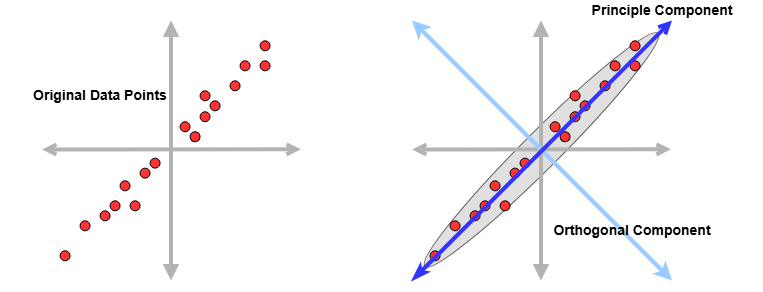

In [46]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50, random_state = 0)
X_reduced = svd.fit_transform(X)
print(svd.explained_variance_ratio_)

[0.0016919  0.0080086  0.0066137  0.00585545 0.00566855 0.00513141
 0.00466142 0.00408886 0.00379292 0.00363655 0.00358514 0.00344112
 0.00333823 0.00330843 0.00320177 0.00312768 0.00309058 0.00301519
 0.00293455 0.00289406 0.00281024 0.00276328 0.00275364 0.0027228
 0.00270271 0.00266815 0.0026069  0.00258717 0.00258024 0.00255714
 0.00252607 0.00249565 0.00247508 0.0024353  0.00242097 0.00240043
 0.00237148 0.0023595  0.00235159 0.00231717 0.00230569 0.00229521
 0.00227565 0.00224329 0.00224181 0.00222879 0.0022038  0.00217858
 0.0021593  0.00214457]


In [47]:
X_reduced.shape

(5853, 50)

<Axes: >

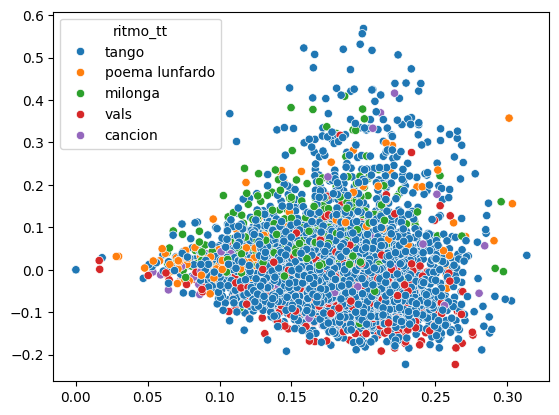

In [48]:
sns.scatterplot(x = X_reduced[:, 0], y = X_reduced[:, 1], hue = df["ritmo_tt"])

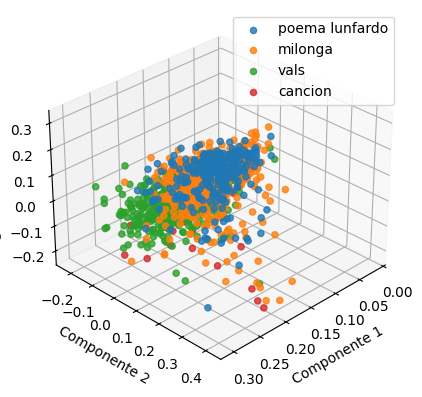

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for category in df["ritmo_tt"].unique():
    if category == "tango":
        continue
    mask = df["ritmo_tt"] == category
    ax.scatter(
        X_reduced[mask, 0],
        X_reduced[mask, 1],
        X_reduced[mask, 2],
        label=category,
        alpha=0.8 
    )

ax.view_init(elev=30, azim=45)
# ax.view_init(elev=30, azim=90)


ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
ax.legend()
plt.show()

## Modelado de tópicos

LDA es una técnica pensada para detectar "tópicos" (entendidos como grupos de palabras que suelen aparecer en el mismo documento) de manera no supervisada. 

Se parece un poco a naive bayes en el sentido de que es una técnica generativa, lo cual significa que hace una suposición respecto de cómo se generan los datos y busca los parámetros que maximicen la probabilidad de observar el conjunto de textos dado.

Recordemos que en naive bayes se asumía un proceso generativo en el cual se elegía una clase, y luego se elegían palabras dada esa clase. Luego se trataba de maximizar P(datos|modelo).

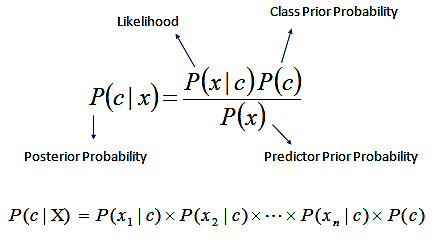

LDA asume un proceso generativo en el que intervienen dos tipos de distribuciones, dirichlet y categórica:
- Existe una cantidad predefinida $k$ de tópicos.
- Cada documento está conformado por más de uno de estos tópicos, pero no en proporciones iguales. En cada documento hay algunos tópicos con más probabilidad y otros con menos. La probabilidad que se le asigna a cada tópico es distinta en cada documento y es una distribución categórica, que se llama $Z$.
- Ahora bien: esta distribución de probabilidad para cada tópico de cada documento también es aleatoria, y viene de OTRA distribución $\theta$ que se llama dirichlet, y que se puede ver como una distribución de distribuciones. Yo sampleo de esta distribución dirichlet y obtengo una distribución categórica.
- Entonces, para generar un documento, yo primero obtengo $Z$ y luego itero para generar las palabras. Al momento de generar cada palabra sampleo de $Z$ y obtengo una categoría. Luego, con esta categoría paso a una TERCERA distribución categórica $W$ que es específica de cada tópico y le asigna a cada palabra una probabilidad. Ahora, al igual que pasó con la distribución categórica de tópicos por documento, esta distribución categórica de palabras por tópico también viene de una distribución dirichlet que se llama $\phi$.
- Ambas distribuciones dirichlets tiene un parámetro ($\alpha$ para $\theta$ y $\beta$ para $\phi$) que lo que dicen es cuán "uniforme" es la probabilidad de cada categoría en las distribuciones categóricas que generan. Valores más chicos generan tópicos/palabras más dominantes; valores más altos generan tópicos/palabras más uniformes.

En el proceso de entrenamiento lo que se hace es encontrar las distribuciones $Z_m$ y $W_k$ que maximizan la probabilidad de observar el corpus dado (porque los parámetros de las otras están definidos de antemano). En particular, se va a buscar minimizar una métrica derivada de la perplexity, que representa cuán "inesperado" es el corpus para el modelo.

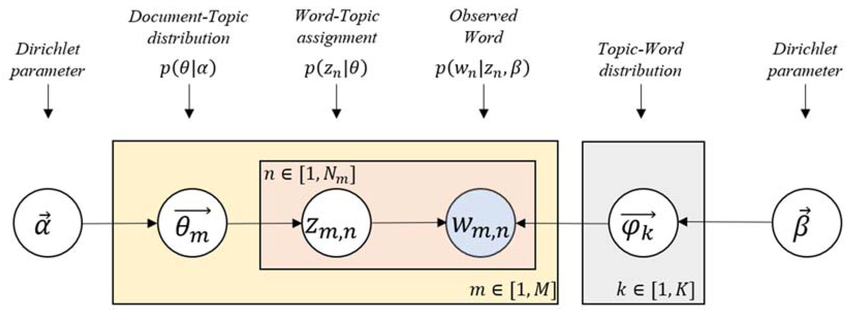

In [50]:
from sklearn.decomposition import LatentDirichletAllocation

In [51]:
vectorizer = CountVectorizer(max_features = 1000, max_df=0.3, min_df = 20)
X = vectorizer.fit_transform(df["letra_lema"])

In [52]:
n_components = 10
doc_topic_prior = None # alpha: cercano a 1 muchos temas en cada documento, cercano a 0, pocos temas con alto p
topic_word_prior = None # beta: cercano a 1 (p. ej. 0.1), lo mismo: muchas palabras correspondientes a cada tópico; cercano a 0 (p. ej. 0.001), pocas palabras con alto p
lda = LatentDirichletAllocation(n_components=n_components, doc_topic_prior = doc_topic_prior, topic_word_prior = topic_word_prior, verbose = True, random_state=0, max_iter = 50, evaluate_every = 1)
doc_tema = lda.fit_transform(X)

iteration: 1 of max_iter: 50, perplexity: 685.3180
iteration: 2 of max_iter: 50, perplexity: 638.2607
iteration: 3 of max_iter: 50, perplexity: 608.2443
iteration: 4 of max_iter: 50, perplexity: 591.9310
iteration: 5 of max_iter: 50, perplexity: 582.2483
iteration: 6 of max_iter: 50, perplexity: 575.8659
iteration: 7 of max_iter: 50, perplexity: 571.2351
iteration: 8 of max_iter: 50, perplexity: 568.0972
iteration: 9 of max_iter: 50, perplexity: 565.6174
iteration: 10 of max_iter: 50, perplexity: 563.6047
iteration: 11 of max_iter: 50, perplexity: 562.0697
iteration: 12 of max_iter: 50, perplexity: 560.7095
iteration: 13 of max_iter: 50, perplexity: 559.5859
iteration: 14 of max_iter: 50, perplexity: 558.6607
iteration: 15 of max_iter: 50, perplexity: 557.9391
iteration: 16 of max_iter: 50, perplexity: 557.3905
iteration: 17 of max_iter: 50, perplexity: 556.8134
iteration: 18 of max_iter: 50, perplexity: 556.4154
iteration: 19 of max_iter: 50, perplexity: 555.9607
iteration: 20 of max_

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [54]:
topico_palabras = scaler.fit_transform(lda.components_.T)
topico_palabras = pd.DataFrame(topico_palabras, index = vectorizer.get_feature_names_out()).round(2)
topico_palabras.sort_values(by = 5, ascending = False).head(20)

,0,1,2,3,4,5,6,7,8,9
alma,0.21,0.08,0.00,0.17,0.03,1.00,0.00,0.52,0.24,0.25
aquel,0.02,0.11,0.12,0.00,0.83,0.87,0.17,0.04,0.09,0.09
dolor,0.00,0.02,0.00,0.03,0.18,0.68,0.00,0.78,0.24,0.13
mujer,0.00,0.01,0.27,0.00,0.00,0.67,0.06,0.02,0.05,0.08
ilusion,0.05,0.01,0.00,0.04,0.19,0.59,0.02,0.16,0.00,0.00
dulce,0.00,0.02,0.00,0.08,0.07,0.57,0.01,0.00,0.05,0.11
triste,0.00,0.05,0.01,0.01,0.14,0.54,0.06,0.18,0.26,0.14
flor,0.17,0.02,0.02,0.04,0.09,0.52,0.12,0.02,0.31,0.13
hoy,0.00,0.03,0.44,0.04,0.53,0.50,0.19,0.57,0.00,0.20
porque,0.01,0.04,0.81,0.14,0.00,0.49,0.15,0.62,0.00,0.22


In [55]:
for topic_idx, topic in enumerate(lda.components_):
    print(f"Tema #{topic_idx}:")
    print(" ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))


Tema #0:
ciudad calle cada dos piel cielo mundo sueño sol historia
Tema #1:
tango bailar barrio bandoneon arrabal viejo milongar compa aquel milonga
Tema #2:
dar ni pa pero decir porque mucho estar saber siempre
Tema #3:
cantar aires canto voz cancion buen buenos cantor guitarra pueblo
Tema #4:
volver aquel vez viejo tiempo ayer otro adio hoy recuerdo
Tema #5:
alma aquel dolor mujer ilusion dulce triste flor hoy porque
Tema #6:
vo sos pa dar bien so tén viejo barrio mina
Tema #7:
poder ni solo dolor saber vez pena pero llorar vivir
Tema #8:
noche ojo viento luna sombra negro luz sobre cielo mano
Tema #9:
corazón ay qué más estar saber decir poder ilusión canción


In [56]:
df = pd.concat([df, pd.DataFrame(doc_tema, index = df.index)], axis = 1)

In [57]:
df[["ritmo_tt", "letra_cons", 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]].sort_values(by = 5, ascending = False)

# Esto como features

,ritmo_tt,letra_cons,0,1,2,3,4,5,6,7,8,9
9259,tango,cuan sublime es el recuerdo | de aquellas noch...,0.001429,0.001429,0.001429,0.001429,0.001429,0.987140,0.001429,0.001429,0.001429,0.001429
5012,tango,yo vivia tristemente | la pena me consumia | p...,0.001471,0.001471,0.001471,0.001471,0.001471,0.986761,0.001471,0.001471,0.001471,0.001471
7844,vals,sueña muchacha con ese amor | que en tu corazo...,0.001923,0.001923,0.001923,0.001923,0.001924,0.982689,0.001923,0.001923,0.001924,0.001924
1784,tango,cuando paso | muy cerquita de mi | me cautivo ...,0.002000,0.002000,0.002001,0.002000,0.002000,0.981996,0.002001,0.002001,0.002001,0.002000
6835,tango,oro en tu cabecita | y un ansia de besar en tu...,0.002128,0.002128,0.002128,0.002128,0.002129,0.980846,0.002128,0.002128,0.002128,0.002128
...,...,...,...,...,...,...,...,...,...,...,...,...
882,poema lunfardo,me yamo dante a linyera pero no es ese mi nomb...,0.000788,0.000788,0.540203,0.000788,0.075859,0.000788,0.378424,0.000788,0.000788,0.000788
2891,milonga,me sacaron el boleto | y a este “bondi” me sub...,0.000752,0.000752,0.938445,0.000752,0.000752,0.000752,0.000752,0.055539,0.000752,0.000752
7011,poema lunfardo,el otro dia el cartero | de apuro me dio una c...,0.041988,0.090315,0.579601,0.100939,0.000730,0.000730,0.150499,0.000730,0.033739,0.000730
7544,tango,a maximo perroti | vendeme un diario con notic...,0.437838,0.000709,0.427931,0.000709,0.000709,0.000710,0.044907,0.085066,0.000709,0.000709


In [58]:
df[["ritmo_tt", "letra_cons", 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]].sort_values(by = 5, ascending = False)["letra_cons"].values[0:10]

array(['cuan sublime es el recuerdo | de aquellas noches de amor | cuando nuestra vida en flor | su dulce nectar bebias | cuantas bellas alegrias | que hermosa nuestra ilusion! | al recordar esos dias | como llora el corazon! | jamas entre mis brazos deliraras triunfante | pues comprendi que no eres lo fiel que te crei! | prefiero mas tu ausencia! que te halles bien distante | porque fatales fueron tus besos para mi | y cuando aquellas noches recuerdes silenciosa | no pretendas con llantos borrar aquel amor! | amor que yo te di | con todo mi fervor! | amargo es el dolor | porque amoroso fui! | sin miramientos tronchaste | las flores de mis ensueños | y falsamente juraste | eterno amor y lealtad | brindandome mil caricias | profundos besos mentidos | abrazos muy mal sentidos | por tu pobre vanidad | lamentaras mil veces las horas que pasaron | y no hallaras consuelo pues no lo mereces | y aquellos falso besos que a mis labios llegaron | por mas que te arrepientas no volveras tal vez! | 

In [59]:
df["topico"] = np.argmax(doc_tema, axis = 1)

In [60]:
df.groupby("topico")["ritmo_tt"].count()

topico
0     261
1     367
2    1241
3     184
4     890
5     862
6     342
7    1054
8     460
9     192
Name: ritmo_tt, dtype: int64

In [61]:
df.groupby("topico")["ritmo_tt"].apply(lambda x: x.value_counts(normalize = True))

topico                
0       tango             0.773946
        milonga           0.076628
        vals              0.065134
        cancion           0.042146
        poema lunfardo    0.042146
1       tango             0.732970
        milonga           0.182561
        poema lunfardo    0.062670
        vals              0.021798
2       tango             0.661563
        milonga           0.166801
        poema lunfardo    0.121676
        cancion           0.026591
        vals              0.023368
3       tango             0.663043
        milonga           0.152174
        vals              0.125000
        cancion           0.038043
        poema lunfardo    0.021739
4       tango             0.773034
        vals              0.133708
        milonga           0.050562
        cancion           0.024719
        poema lunfardo    0.017978
5       tango             0.728538
        vals              0.219258
        cancion           0.024362
        milonga           0.0208

### Búsqueda de k óptimo

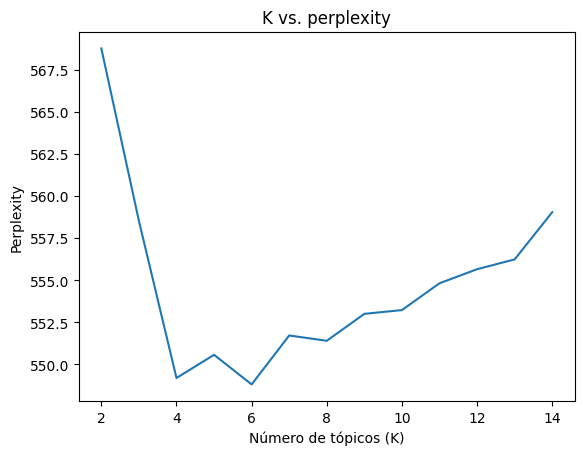

In [62]:
k_values = range(2,15)
scores = []

for k in k_values:
    lda_p = LatentDirichletAllocation(n_components=k, random_state=0, max_iter = 30)
    lda_p.fit(X)
    scores.append(lda_p.perplexity(X))

plt.plot(k_values, scores)
plt.xlabel("Número de tópicos (K)")
plt.ylabel("Perplexity")
plt.title("K vs. perplexity")
plt.show()

# Consignas del TP 2 (25/07)

1) Vectorizar el corpus usando el `CountVectorizer` y graficar las palabras más frecuentes en función de la variable target elegida (si es continua, discretizar). Para eso, buscar los parámetros del `CountVectorizer` que arrojen resultados interesantes. En la notebook no es necesario que muestren todos los experimentos, sino únicamente el que más les haya convencido.
2) Repetir el experimento anterior y graficar, pero usando el `TfIdfVectorizer` y haciendo la suma de los scores. ¿Cambian los resultados?
3) Plotear las observaciones en 2 y 3 dimensiones obtenidas con PCA (`TruncatedSVD`), informando en cada caso el porcentaje de varianza explicada. Háganlo para las matrices de 1 y 2, y analicen si en los gráficos la separación de los puntos coincide con su categoría (pueden elegir un subset de observaciones, preferentemente balanceado, para que no tarde tanto en correrles).
4) Aplicar LDA sobre el dataset completo (con o sin lematizar, según elijan) y reportar los resultados. Jueguen con los parámetros para ver si encuentran algún resultado interesante. Y si encuentran, arriesguen alguna interpretación. (Ojo! El análisis de tópicos no habla por sí solo. En todo caso, nos puede llegar a tirar pistas de dónde poner la mirada. Antes de sacar cualquier conclusión es necesario inspeccionar manualmente algunos ejemplos y cruzarlos con otras variables para saber si el modelado descubrió algo interesante o si es un falso positivo).

*Se entrega el 25/07 vía campus.*

# Papers para chusmear
- Germán Rosati (2022). "Procesamiento de Lenguaje Natural aplicado a las ciencias sociales: Detección de tópicos en letras de tango." Centro de Investigaciones y Estudios Sociológicos, Revista Latinoamericana de Metodología de la Investigación Social; 12; 23; 4-2022; 38-60. Disponible [acá](https://ri.conicet.gov.ar/handle/11336/187219).
- Germán Rosati y Laia Domenech (2021). "Los temas del rock nacional. Una aproximación mediante técnicas de minería de texto". XIV Jornadas de Sociología. Facultad de Ciencias Sociales, Universidad de Buenos Aires, Buenos Aires. Disponible [acá](https://www.researchgate.net/profile/German-Rosati/publication/355796359_Los_temas_del_rock_nacional_Una_aproximacion_mediante_tecnicas_de_mineria_de_texto/links/617ef03b3c987366c30d4bac/Los-temas-del-rock-nacional-Una-aproximacion-mediante-tecnicas-de-mineria-de-texto.pdf?_tp=eyJjb250ZXh0Ijp7ImZpcnN0UGFnZSI6InB1YmxpY2F0aW9uIiwicGFnZSI6InB1YmxpY2F0aW9uIn19).